In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
properties = pd.read_csv('/Users/cmarr/Documents/Travis_data_science/Kaggle/zillow/data/properties_2016.csv')

/Applications/anaconda/envs/zillow/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train = pd.read_csv('/Users/cmarr/Documents/Travis_data_science/Kaggle/zillow/data/train_2016.csv', parse_dates = ["transactiondate"])

In [4]:
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [5]:
sample = pd.read_csv('/Users/cmarr/Documents/Travis_data_science/Kaggle/zillow/data/sample_submission.csv')

In [6]:
sample.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [7]:
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [8]:
properties.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

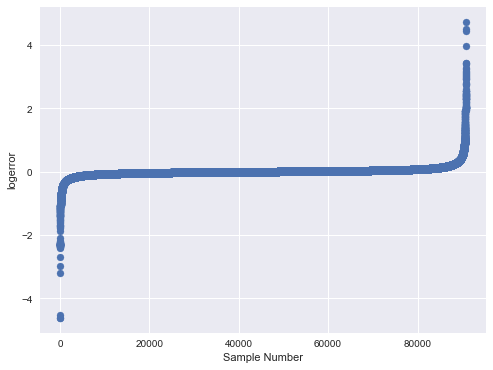

In [9]:
plt.figure(figsize = (8,6))
plt.scatter(range(len(train)), np.sort(train.logerror.values))
plt.xlabel('Sample Number')
plt.ylabel('logerror')
plt.show()

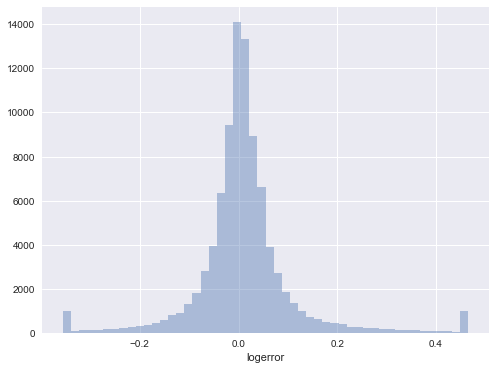

In [10]:
ulimit = np.percentile(train.logerror.values, 99)
llimit = np.percentile(train.logerror.values, 1)
exp_train = train.copy(deep=True)
exp_train.logerror[exp_train.logerror > ulimit] = ulimit
exp_train.logerror[exp_train.logerror < llimit] = llimit
plt.figure(figsize = (8,6))
sns.distplot(exp_train.logerror.values, bins=50, kde=False)
plt.xlabel('logerror')
plt.show()

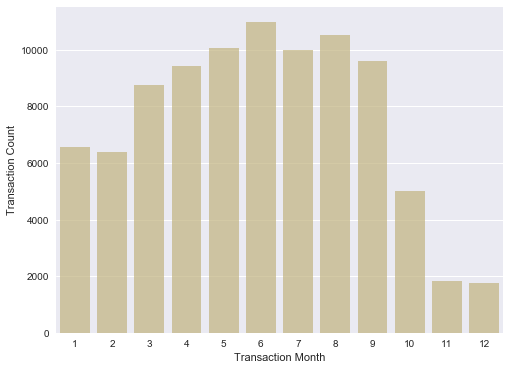

In [11]:
#Note: all the training observations are from 2016
train['transaction_month'] = train['transactiondate'].dt.month
cnt_month = train.transaction_month.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(cnt_month.index, cnt_month.values, alpha=0.7, color = color[4])
plt.xlabel('Transaction Month')
plt.ylabel('Transaction Count')
plt.show()

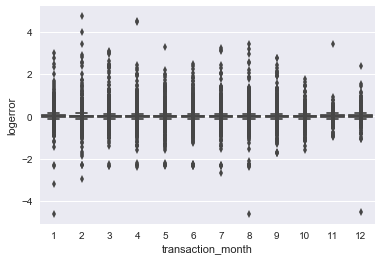

In [12]:
sns.boxplot(x="transaction_month", y="logerror", data=train)

In [125]:
merged = pd.merge(train,properties,how='left',on='parcelid')
merged['transaction_month'] = merged['transactiondate'].dt.month
merged['lat_bins'] = pd.cut(merged.latitude, bins=100, labels=False)
merged['lon_bins'] = pd.cut(merged.longitude, bins=100, labels=False)
x_train = merged.drop(['parcelid', 'logerror','transactiondate'], axis=1)
target = merged['logerror']

print(x_train.head())
print(target.head())

   transaction_month  airconditioningtypeid  architecturalstyletypeid  \
0                  1                    1.0                       NaN   
1                  1                    NaN                       NaN   
2                  1                    1.0                       NaN   
3                  1                    1.0                       NaN   
4                  1                    NaN                       NaN   

   basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0           NaN          2.0         3.0                  NaN   
1           NaN          3.5         4.0                  NaN   
2           NaN          3.0         2.0                  NaN   
3           NaN          2.0         2.0                  NaN   
4           NaN          2.5         4.0                  NaN   

   buildingqualitytypeid  calculatedbathnbr  decktypeid  \
0                    4.0                2.0         NaN   
1                    NaN                3.5         

In [15]:
parcels = properties.parcelid.unique()
test = pd.DataFrame(parcels, columns = ['ParcelId'])
test['201610'] = 0
test['201611'] = 0
test['201612'] = 0
test['201710'] = 0
test['201711'] = 0
test['201712'] = 0
test.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [16]:
test.to_csv('data/submission.csv', index=False)

In [127]:
lamap = merged[['transaction_month', 'latitude', 'longitude', 'logerror']]

In [129]:
deciles = lamap.logerror.quantile(np.arange(0, 1.1, 0.1))
group_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
lamap['categories'] = pd.cut(lamap['logerror'], deciles, labels=group_names)
lamap['categories'] = lamap.categories.astype('category').cat.codes

In [132]:
# g = sns.PairGrid(lamap, hue='categories')
# g = g.map(plt.scatter)
# plt.show()

In [133]:
lamap['lat_bins'] = pd.cut(lamap.latitude, bins=100, labels=False)
lamap['lon_bins'] = pd.cut(lamap.longitude, bins=100, labels=False)
# lamap.head()

In [134]:
test = lamap.groupby(['transaction_month','lat_bins', 'lon_bins'])['logerror'].agg({'logerror': np.mean})
test.reset_index(inplace=True)
# test.head()

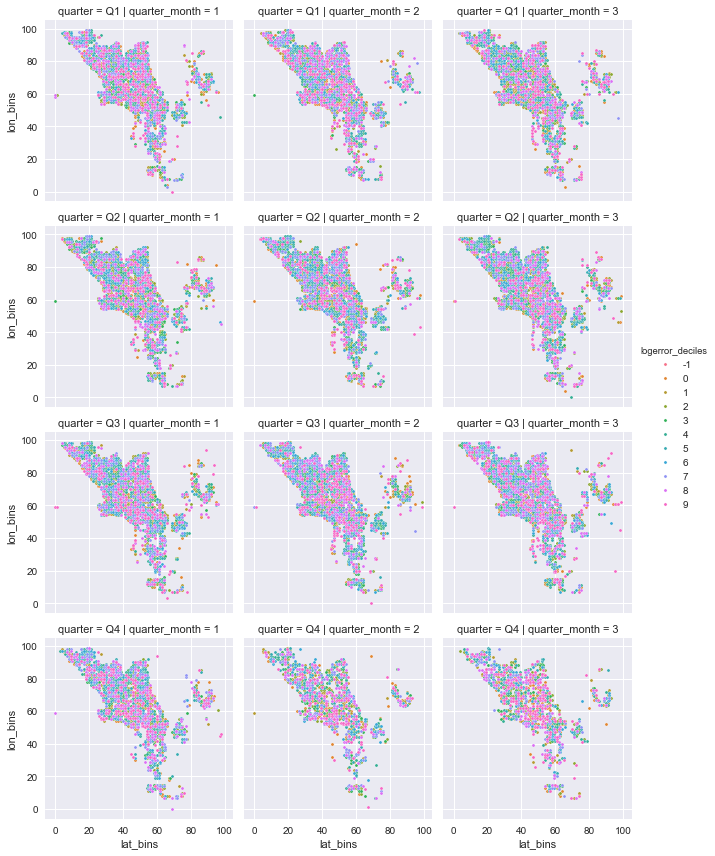

In [123]:
deciles = test.logerror.quantile(np.arange(0, 1.1, 0.1))
group_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
test['logerror_deciles'] = pd.cut(test['logerror'], deciles, labels=group_names)
test['logerror_deciles'] = test.logerror_deciles.astype('category').cat.codes
quarters = {1: 'Q1', 2: 'Q1', 3: 'Q1', 4: 'Q2', 5: 'Q2', 6: 'Q2', 7: 'Q3', 8: 'Q3', 9: 'Q3', 10: 'Q4', 11: 'Q4', 12: 'Q4'}
quarter_month = {1: '1', 2: '2', 3: '3', 4: '1', 5: '2', 6: '3', 7: '1', 8: '2', 9: '3', 10: '1', 11: '2', 12: '3'}
test['quarter'] = test.transaction_month.map(quarters)
test['quarter_month'] = test.transaction_month.map(quarter_month)

g = sns.FacetGrid(test, col='quarter_month', row='quarter', hue='logerror_deciles')
# g = g.map(plt.scatter)
g = (g.map(plt.scatter, 'lat_bins', 'lon_bins', edgecolor="w", s=10).add_legend())
plt.show()

# plt.figure(figsize = (8,6))
# sns.lmplot('lat_bins', 'lon_bins', data=test, fit_reg=False, hue='logerror_deciles')
# plt.xlabel('Latitude')
# plt.ylabel('logerror')
# plt.show()

In [67]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [112]:
# create model
lamap.dropna(axis=0, how='any', inplace=True)
X = lamap[['lat_bins', 'lon_bins']]
months = pd.get_dummies(lamap.transaction_month)
x = X.join(months)
y = lamap[['logerror']]
# x.isnull().groupby(['latitude', 'longitude']).count()
X = x.as_matrix()
Y = y.as_matrix()

In [113]:
model = Sequential()
model.add(Dense(60, input_dim=14, activation='sigmoid'))
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [124]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=500, batch_size=100)

Epoch 1/500
90275/90275 [==============================] - 4s - loss: 0.0680 - acc: 0.0094     
Epoch 2/500
90275/90275 [==============================] - 3s - loss: 0.0680 - acc: 0.0094     
Epoch 3/500
90275/90275 [==============================] - 3s - loss: 0.0680 - acc: 0.0094     
Epoch 4/500
90275/90275 [==============================] - 3s - loss: 0.0680 - acc: 0.0094     
Epoch 5/500
90275/90275 [==============================] - 3s - loss: 0.0680 - acc: 0.0094     
Epoch 6/500
90275/90275 [==============================] - 3s - loss: 0.0680 - acc: 0.0094     
Epoch 7/500
90275/90275 [==============================] - 3s - loss: 0.0680 - acc: 0.0094     
Epoch 8/500
90275/90275 [==============================] - 3s - loss: 0.0680 - acc: 0.0094     
Epoch 9/500
90275/90275 [==============================] - 3s - loss: 0.0680 - acc: 0.0094     
Epoch 10/500
90275/90275 [==============================] - 3s - loss: 0.0680 - acc: 0.0094     
Epoch 11/500
90275/90275 [=============

90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 168/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 169/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 170/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 171/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 172/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 173/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 174/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 175/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 176/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 177/500
90275/90275 [=======

90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 334/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 335/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 336/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 337/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 338/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 339/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 340/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 341/500
90275/90275 [==============================] - 3s - loss: 0.0679 - acc: 0.0094     
Epoch 342/500
90275/90275 [==============================] - 2s - loss: 0.0679 - acc: 0.0094     
Epoch 343/500
90275/90275 [=======

90275/90275 [==============================] - 2s - loss: 0.0678 - acc: 0.0094     
Epoch 500/500
90275/90275 [==============================] - 2s - loss: 0.0678 - acc: 0.0094     


In [99]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

90275/90275 [==============================] - 3s     

acc: 0.94%
